<a href="https://colab.research.google.com/github/roulupen/EVAAssignments/blob/master/Session2Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Not an ideal network**

## Install keras and import the library

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


### Import depedent library and functions for model building

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Convolution2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load train, test data set into different variables

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


### Display the 1st image from the training data set

(60000, 28, 28)


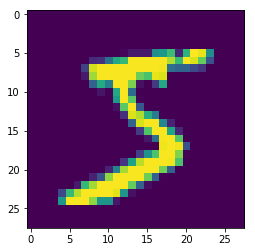

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

### Reshape all input imges into 28x28x1(basically here we are defining the input channel as 1)

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

### The pixel value of any cell can range from 0-255, just to normalize it we are dividing each cell value by 255. So, max and min value will range between 0-1 for easier calculation

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

### Last 10 actual output from the training data set

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [8]:
print("Dataset samples have min of %.1f and max of %.1f." %(np.min(y_train), np.max(y_train)))

Dataset samples have min of 0.0 and max of 9.0.


### As you can see from the above result we have output between 0-9 digits, in-order to specify that in our model we are doing one-hot codding to represent different label.

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

### After one-hot encoding all the digits will be replaced with equivalent binary one-hot coding values. Here we are displaying the same last 10 output from the training data set

In [10]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

### Defining model for our dataset, and what individual lines are doing defined please refer to inline comment.



- Defining a sequential model
- 1st, Convolution layer, input=28x28x1 => Channel=(3x3x1), kernel=32 => Output = 26x26x32
- 2nd, Convolution layer, input=26x26x32 => channel=(3x3x32), kernel=64 => Output=24x24x64
- 3rd, Convolution layer, input=24x24x64 => channel=(3x3x64), kernel=128 => Output=22x22x128
- 4th, Maxpooling layer, input=22x22x128 => Max pooling channel=(2x2) => Output=11x11x128
- 5th, Convolution layer, input=11x11x128 => channel=(3x3x128), kernel=256 => Output=9x9x256
- 6th, Convolution layer, input=9x9x256 => channel=(3x3x256), kernel=512 => Output=7x7x512
- 7th, Convolution layer, input=7x7x512 => channel=(3x3x512), kernel=1024 => Output=5x5x1024
- 8th, Convolution layer, input=5x5x1024 => channel=(3x3x1024), kernel=2048 => Output=3x3x2048
- 9th, Convolution layer, input=3x3x2048 => channel=(3x3x2048), kernel=10 => Output=1x1x10, At the last layer we are defining 10 channel since our final output has 10 classes
- Flatten the 1x1x10 into a 1-D array
- Using softmax activation we are predicting different label for the input image





In [11]:
# importing functions for Activation and MaxPooling from Keras
from keras.layers import Activation, MaxPooling2D

model = Sequential() # Defining a sequential model
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) # 1st, Convolution layer, input=28x28x1 => Channel=(3x3x1), kernel=32 => Output = 26x26x32, recptive field 
model.add(Convolution2D(64, 3, 3, activation='relu')) # 2nd, Convolution layer, input=26x26x32 => channel=(3x3x32), kernel=64 => Output=24x24x64
model.add(Convolution2D(128, 3, 3, activation='relu')) # 3rd, Convolution layer, input=24x24x64 => channel=(3x3x64), kernel=128 => Output=22x22x128

model.add(MaxPooling2D(pool_size=(2, 2))) # 4th, Maxpooling layer, input=22x22x128 => Max pooling channel=(2x2) => Output=11x11x128

model.add(Convolution2D(256, 3, 3, activation='relu')) # 5th, Convolution layer, input=11x11x128 => channel=(3x3x128), kernel=256 => Output=9x9x256
model.add(Convolution2D(512, 3, 3, activation='relu')) # 6th, Convolution layer, input=9x9x256 => channel=(3x3x256), kernel=512 => Output=7x7x512
model.add(Convolution2D(1024, 3, 3, activation='relu')) # 7th, Convolution layer, input=7x7x512 => channel=(3x3x512), kernel=1024 => Output=5x5x1024
model.add(Convolution2D(2048, 3, 3, activation='relu')) # 8th, Convolution layer, input=5x5x1024 => channel=(3x3x1024), kernel=2048 => Output=3x3x2048
model.add(Convolution2D(10, 3, 3, activation='relu')) # 9th, Convolution layer, input=3x3x2048 => channel=(3x3x2048), kernel=10 => Output=1x1x10, At the last layer we are defining 10 channel since our final output has 10 classes

model.add(Flatten()) # Flatten the 1x1x10 into a 1-D array
model.add(Activation('softmax')) # Using softmax activation we are predicting different label for the input image

model.summary()

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 5, 5, 1024)        4719616   
__________

### Copiling the model with different loss function and optmizer

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

### Fit the model with our traning and test data set, we are defining number batch size = 32, so number of training sample in each iteration is 32 and epoch=10, means there will 10 times full forward pass will occur while building the model

In [13]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 119s 2ms/step - loss: 2.2042 - acc: 0.1464
Epoch 2/10
60000/60000 [==============================] - 113s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 3/10
60000/60000 [==============================] - 113s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 4/10
60000/60000 [==============================] - 113s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 5/10
60000/60000 [==============================] - 114s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 6/10
60000/60000 [==============================] - 113s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 7/10
60000/60000 [==============================] - 113s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 8/10
60000/60000 [==============================] - 113s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 9/10
60000/60000 [==============================] - 113s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 10/10
60000/60000 [==============================] - 113s 2ms/step - loss: 2.3026 - a

### Evaluating the model performance on test set

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [15]:
print(score)

[2.3025851249694824, 0.098]


### Predicting the output label on test dataset using our model

In [0]:
y_pred = model.predict(X_test)

### Compare the last 10 test dataset output using predicted and actual values

In [17]:
print(y_pred[:9])
print(Y_test[:9])

[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


## Increasing model efficiency 

#### 1 - In our previous model the number of parameters are huge but still we were getting a very low accuracy, just to make sure we are emphasizing the pixel which has more weight I'm going to add Max Pooling at very begining of the model instead of very late and I'm going to use multiple max pooling layer
#### 2 - Increasing the number of epoch to 20.

In [18]:
# importing functions for Activation and MaxPooling from Keras
from keras.layers import Activation, MaxPooling2D

model_new = Sequential() # Defining a sequential model
model_new.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) # 1st, Convolution layer, input=28x28x1 => Channel=(3x3x1), kernel=32 => Output = 26x26x32, recptive field 
model_new.add(MaxPooling2D(pool_size=(2, 2))) # 2nd, Maxpooling layer, input=26x26x32 => Max pooling channel=(2x2) => Output=13x13x32
model_new.add(Convolution2D(64, 3, 3, activation='relu')) # 3rd, Convolution layer, input=13x13x32 => channel=(3x3x32), kernel=64 => Output=11x11x64

model_new.add(MaxPooling2D(pool_size=(2, 2))) # 4th, Maxpooling layer, input=11x11x64 => Max pooling channel=(2x2) => Output=5x5x64
model_new.add(Convolution2D(128, 3, 3, activation='relu')) # 3rd, Convolution layer, input=5x5x64 => channel=(3x3x64), kernel=128 => Output=3x3x128
model_new.add(Convolution2D(10, 3, 3, activation='relu')) # 4th, Convolution layer, input=3x3x128 => channel=(3x3x128), kernel=10 => Output=1x1x10,
# At the last layer we are defining 10 channel since our final output has 10 classes


model_new.add(Flatten()) # Flatten the 1x1x10 into a 1-D array
model_new.add(Activation('softmax')) # Using softmax activation we are predicting different label for the input image

model_new.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 3, 3, 128)         73856     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 1, 1, 10)          11530     
_________________________________________________________________
flatten_2 (Flatten)          (None, 10)                0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.


In [0]:
model_new.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [20]:
model_new.fit(X_train, Y_train, batch_size=32, nb_epoch=20, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/20
60000/60000 [==============================] - 8s 130us/step - loss: 1.3431 - acc: 0.5318
Epoch 2/20
60000/60000 [==============================] - 9s 143us/step - loss: 1.1633 - acc: 0.6017
Epoch 3/20
60000/60000 [==============================] - 8s 135us/step - loss: 1.0673 - acc: 0.6041
Epoch 4/20
60000/60000 [==============================] - 7s 124us/step - loss: 0.9226 - acc: 0.6054
Epoch 5/20
60000/60000 [==============================] - 7s 124us/step - loss: 0.8176 - acc: 0.6504
Epoch 6/20
60000/60000 [==============================] - 8s 125us/step - loss: 0.7107 - acc: 0.6964
Epoch 7/20
60000/60000 [==============================] - 8s 137us/step - loss: 0.7061 - acc: 0.6967
Epoch 8/20
60000/60000 [==============================] - 9s 142us/step - loss: 0.7032 - acc: 0.6974
Epoch 9/20
60000/60000 [==============================] - 8s 128us/step - loss: 0.7014 - acc: 0.6975
Epoch 10/20
60000/60000 [==============================] - 7s 124us/step - loss: 0.7015 - a

In [0]:
score_new = model_new.evaluate(X_test, Y_test, verbose=0)

In [22]:
print(score_new)

[0.7348871189117432, 0.6899]
